['Var1_Iter1', 'Var2_Iter1', 'Var1_Iter2', 'Var2_Iter2', 'Var1_Iter3', 'Var2_Iter3', 'Var1_Iter4', 'Var2_Iter4', 'Var1_Iter5', 'Var2_Iter5', 'Var1_Iter6', 'Var2_Iter6', 'Var1_Iter7', 'Var2_Iter7', 'Var1_Iter8', 'Var2_Iter8', 'Var1_Iter9', 'Var2_Iter9', 'Var1_Iter10', 'Var2_Iter10', 'Var1_Iter11', 'Var2_Iter11', 'Var1_Iter12', 'Var2_Iter12', 'Var1_Iter13', 'Var2_Iter13', 'Var1_Iter14', 'Var2_Iter14', 'Var1_Iter15', 'Var2_Iter15', 'Var1_Iter16', 'Var2_Iter16', 'Var1_Iter17', 'Var2_Iter17', 'Var1_Iter18', 'Var2_Iter18', 'Var1_Iter19', 'Var2_Iter19', 'Var1_Iter20', 'Var2_Iter20', 'Var1_Iter21', 'Var2_Iter21', 'Var1_Iter22', 'Var2_Iter22', 'Var1_Iter23', 'Var2_Iter23', 'Var1_Iter24', 'Var2_Iter24', 'Var1_Iter25', 'Var2_Iter25', 'Var1_Iter26', 'Var2_Iter26', 'Var1_Iter27', 'Var2_Iter27', 'Var1_Iter28', 'Var2_Iter28', 'Var1_Iter29', 'Var2_Iter29', 'Var1_Iter30', 'Var2_Iter30', 'Var1_Iter31', 'Var2_Iter31', 'Var1_Iter32', 'Var2_Iter32', 'Var1_Iter33', 'Var2_Iter33', 'Var1_Iter34', 'Var2_Iter34

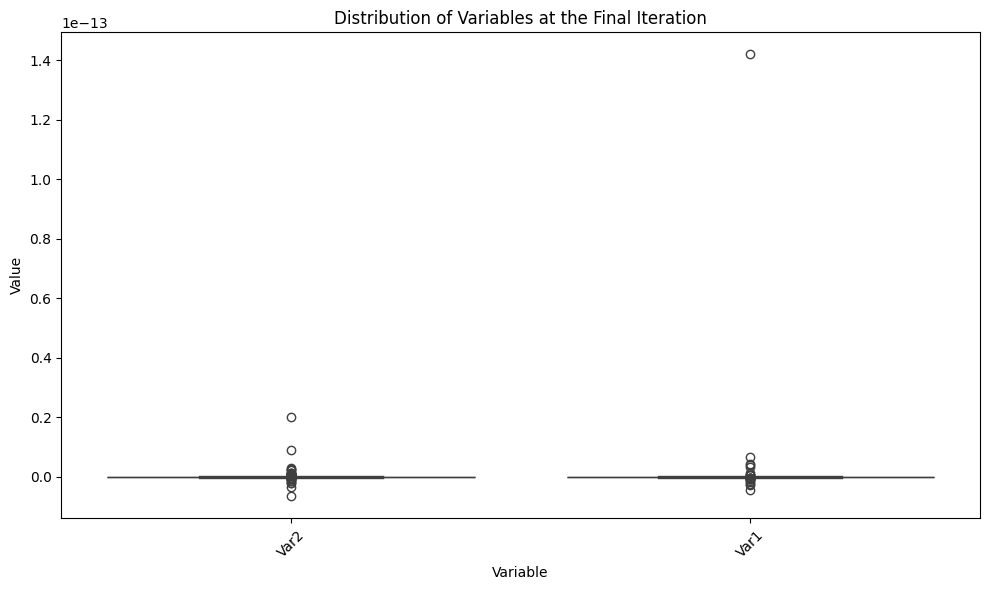

<ipython-input-7-02861cfafd79>:77: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_variables_by_iteration = reshaped_data.groupby('Iteration').mean().reset_index()


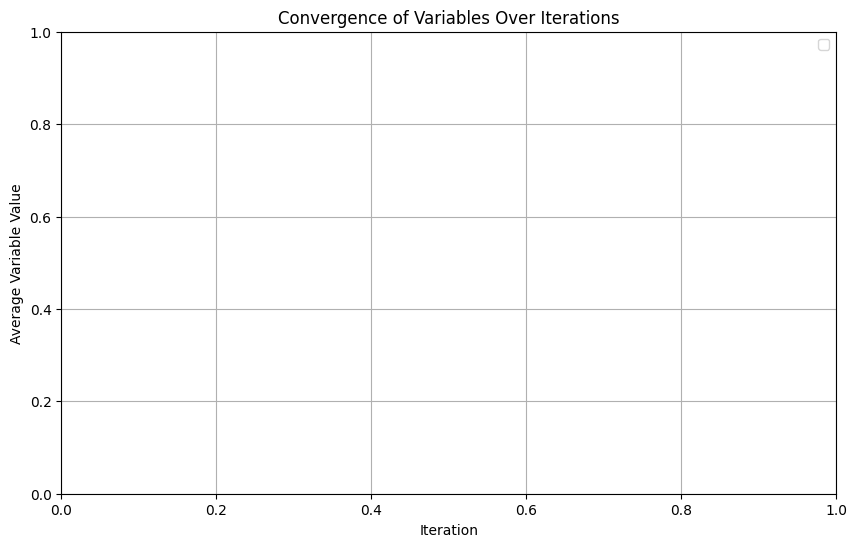

Descriptive statistics for final positions of all particles:
         Particle  Iteration          Var1          Var2
count  150.000000      150.0  1.500000e+02  1.500000e+02
mean    74.500000      300.0  9.536404e-16  1.736249e-16
std     43.445368        0.0  1.163024e-14  1.982858e-15
min      0.000000      300.0 -4.584668e-15 -6.597692e-15
25%     37.250000      300.0 -1.378616e-16 -1.056919e-16
50%     74.500000      300.0 -1.568283e-17 -3.273903e-17
75%    111.750000      300.0  5.616848e-17  7.260814e-17
max    149.000000      300.0  1.419731e-13  1.997175e-14

Standard deviation of final positions (lower values indicate convergence):
Var1    1.163024e-14
Var2    1.982858e-15
dtype: float64


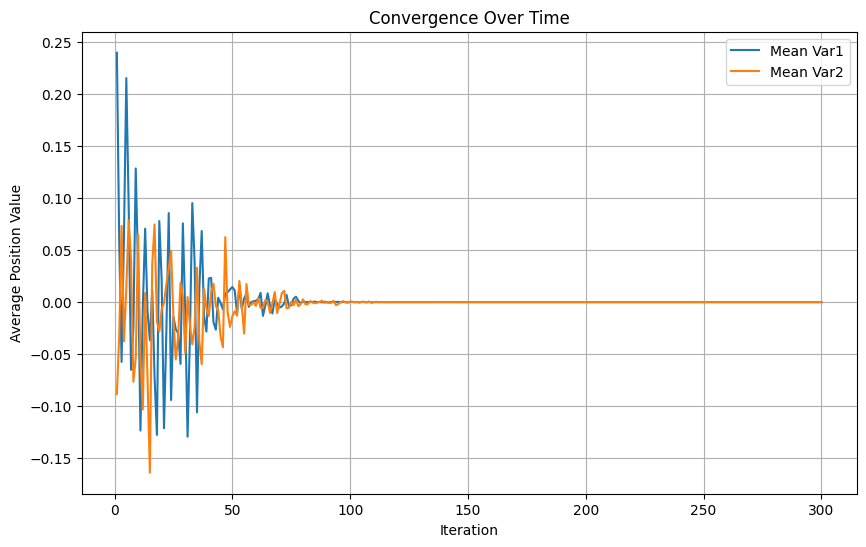

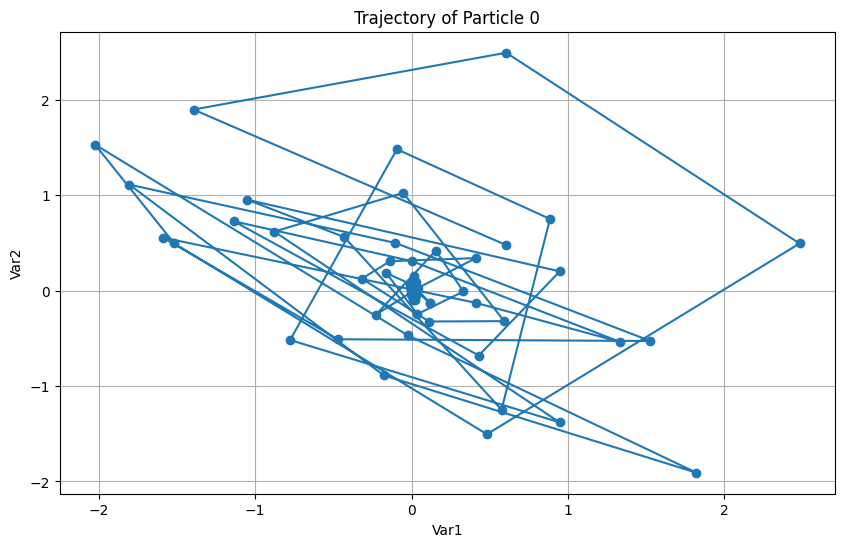

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import seaborn as sns

# Load the data from a file
# You would need to mount your Google Drive first or upload the file to Colab
# For example, if using Google Drive:
# from google.colab import drive
# drive.mount('/content/drive')
# df = pd.read_excel('/content/drive/My Drive/path_to_file/historicalData.xlsx')

df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/data/historicalData.xlsx')  # Update the path to where you've stored your file

# Data preprocessing
# Assume that each row is a particle and columns are structured as Var1_Iter1, Var2_Iter1, ..., VarN_IterM
# We need to reshape this into a long format with columns ['Particle', 'Iteration', 'Var1', 'Var2', ..., 'VarN']

# Extract iteration numbers and variable names from the column headers
iterations = sorted(set(int(col.split('_')[-1][4:]) for col in df.columns if col.startswith('Var')))
variables = sorted(set(col.split('_')[0] for col in df.columns if col.startswith('Var')))

# Reshape the dataframe
reshaped_data = []
for i, row in df.iterrows():
    for iter_num in iterations:
        iter_data = [row[f'{var}_Iter{iter_num}'] for var in variables]
        reshaped_data.append([i, iter_num] + iter_data)

# Create a new dataframe with the reshaped data
long_df = pd.DataFrame(reshaped_data, columns=['Particle', 'Iteration'] + variables)

print(df.columns.tolist())

# Descriptive statistics for each column
descriptive_stats = df.describe()
print("Descriptive Statistics:")
print(descriptive_stats)

# Check for the presence of any NaN values in the DataFrame
nan_counts = df.isna().sum()
print("\nNaN Counts in Each Column:")
print(nan_counts)

# Preprocessing and reshaping the data
# We assume that columns follow a naming convention like Var1_Iter1, Var2_Iter1, ..., VarN_IterM
# Extract iteration and variable names
variable_columns = [col for col in df.columns if col.startswith('Var')]
iteration_numbers = sorted(list(set(int(col.split('_')[-1].replace('Iter', '')) for col in variable_columns)))
variable_names = sorted(list(set('_'.join(col.split('_')[:-1]) for col in variable_columns)))

# Reshape the dataframe to long format for analysis
reshaped_data = df.melt(var_name='Variable_Iteration', value_name='Value')

# Split the 'Variable_Iteration' into separate 'Variable' and 'Iteration' columns
reshaped_data[['Variable', 'Iteration']] = reshaped_data['Variable_Iteration'].str.extract(r'(Var\d+)_(Iter\d+)')
reshaped_data.drop('Variable_Iteration', axis=1, inplace=True)
reshaped_data['Iteration'] = reshaped_data['Iteration'].str.replace('Iter', '').astype(int)

# Sort by iteration
reshaped_data.sort_values(by='Iteration', inplace=True)

# Analysis: Visualize the distribution of variables at the final iteration
final_iteration = reshaped_data[reshaped_data['Iteration'] == max(iteration_numbers)]

plt.figure(figsize=(10, 6))
sns.boxplot(data=final_iteration, x='Variable', y='Value')
plt.title('Distribution of Variables at the Final Iteration')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Analysis: Convergence of variables over iterations
# We will plot the average of each variable at each iteration to see how they converge
# Ensure that 'reshaped_data' is correctly populated with numerical data
print(reshaped_data.head())

# Calculate the mean for each iteration
avg_variables_by_iteration = reshaped_data.groupby('Iteration', numeric_only=True).mean().reset_index()

# Plot the average of each variable at each iteration
plt.figure(figsize=(10, 6))
for column in avg_variables_by_iteration.columns:
    if column.startswith('Var'):  # Assuming variable names start with 'Var'
        plt.plot(avg_variables_by_iteration['Iteration'], avg_variables_by_iteration[column], label=column)

plt.xlabel('Iteration')
plt.ylabel('Average Variable Value')
plt.title('Convergence of Variables Over Iterations')
plt.legend(title='Variable')
plt.grid(True)
plt.show()

# Descriptive statistics for the final positions of all particles
final_positions = long_df[long_df['Iteration'] == max(long_df['Iteration'])]
final_descriptive_stats = final_positions.describe()
print("Descriptive statistics for final positions of all particles:")
print(final_descriptive_stats)

# Check for convergence by looking at the spread of the final positions
final_position_spread = final_positions[variables].std()
print("\nStandard deviation of final positions (lower values indicate convergence):")
print(final_position_spread)

# Plot the convergence over time
# For each iteration, calculate the mean position of all particles
mean_positions_over_time = long_df.groupby('Iteration')[variables].mean()

plt.figure(figsize=(10, 6))
for var in variables:
    plt.plot(mean_positions_over_time.index, mean_positions_over_time[var], label=f'Mean {var}')
plt.xlabel('Iteration')
plt.ylabel('Average Position Value')
plt.title('Convergence Over Time')
plt.legend()
plt.grid(True)
plt.show()

# Analyse the distribution of the best costs
# Assume there is a column 'BestCost' in the long_df that records the best cost found by the swarm at each iteration
if 'BestCost' in long_df.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(long_df['BestCost'], kde=True)
    plt.xlabel('Best Cost')
    plt.ylabel('Frequency')
    plt.title('Distribution of Best Cost Over Iterations')
    plt.grid(True)
    plt.show()

    # Plot the best cost over iterations
    plt.figure(figsize=(10, 6))
    plt.plot(long_df['Iteration'], long_df['BestCost'])
    plt.xlabel('Iteration')
    plt.ylabel('Best Cost')
    plt.title('Best Cost Over Iterations')
    plt.grid(True)
    plt.show()

# Plot the trajectory of the first particle
first_particle_data = long_df[long_df['Particle'] == 0]
plt.figure(figsize=(10, 6))
plt.plot(first_particle_data['Var1'], first_particle_data['Var2'], marker='o')
plt.title('Trajectory of Particle 0')
plt.xlabel('Var1')
plt.ylabel('Var2')
plt.grid(True)
plt.show()

# Save the figure if needed
# plt.savefig('particle_trajectory.png')

# More visualizations or statistical analysis can be added here based on your requirements.